<a href="https://colab.research.google.com/github/antariksh2648/Is-the-road-safe-assignment_PClub/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the Dataset from kaggle**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"antarikshchoudhary","key":"d00bb3e89e3f3f2d10083fbf8a2dca6a"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                        Data Science Job Salaries                            7KB  2022-06-15 08:59:12           6107        206  1.0              
surajjha101/bigbasket-entire-product-list-28k-datapoints  BigBasket Entire Product List (~28K datapoints)      6MB  2022-06-22 12:51:18           1918         86  1.0              
victorsoeiro/netflix-tv-shows-and-movies                  Netflix TV Shows and Movies                          2MB  2022-05-15 00:01:23          16575        481  1.0              
sameepvani/nasa-nearest-earth-objects                     NASA - Nearest Earth Objects         

In [7]:
! kaggle datasets download -d l3llff/flowers

 99% 225M/228M [00:16<00:00, 18.1MB/s]
100% 228M/228M [00:16<00:00, 14.1MB/s]


In [ ]:
! unzip flowers.zip

## **Importing all the required libraries**

In [2]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import glob
import os

## **Importing all the files using glob**

In [3]:
image_net = glob.glob("/content/flowers/*/**")

In [4]:
len(image_net)

15740

## **Randomising the sample**

In [5]:
from random import shuffle
shuffle(image_net)
image_net

['/content/flowers/magnolia/41240836395_8060d6dae6_c.jpg',
 '/content/flowers/astilbe/6006836018_b0572a2904_c.jpg',
 '/content/flowers/magnolia/3440336907_e78a6e0be3_c.jpg',
 '/content/flowers/black_eyed_susan/1222886008_3fb639e13d_c.jpg',
 '/content/flowers/iris/7097465915_bf0035fd3e_c.jpg',
 '/content/flowers/california_poppy/49709532401_139ba45d6f_c.jpg',
 '/content/flowers/water_lily/35568806941_20091fd6ae_c.jpg',
 '/content/flowers/rose/14480749258_2e089a43f6_c.jpg',
 '/content/flowers/coreopsis/18706611654_3fed922242_c.jpg',
 '/content/flowers/rose/14868991779_87e3eb76a2_c.jpg',
 '/content/flowers/common_daisy/8446147377_067742ecf6_c.jpg',
 '/content/flowers/dandelion/26597673314_a7e4ffbdf2_c.jpg',
 '/content/flowers/iris/40612282010_ed276b3892_c.jpg',
 '/content/flowers/california_poppy/49718016483_624fe4bd54_c.jpg',
 '/content/flowers/coreopsis/7898242078_f2d0688ac1_c.jpg',
 '/content/flowers/sunflower/15496328905_d861e28d46_c.jpg',
 '/content/flowers/carnation/515830608_4e2649

## **To show the image at 0th position**

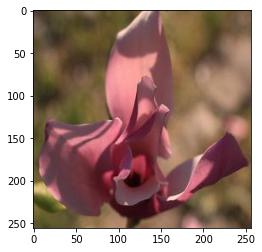

In [6]:
from PIL import Image
img=Image.open(image_net[0])
plt.imshow(img)

In [7]:
np.array(img)

array([[[ 84,  64,  53],
        [ 82,  62,  51],
        [ 78,  60,  48],
        ...,
        [119,  97,  73],
        [116,  94,  70],
        [114,  92,  68]],

       [[ 85,  65,  54],
        [ 83,  63,  52],
        [ 80,  62,  50],
        ...,
        [120,  98,  74],
        [117,  95,  71],
        [115,  93,  69]],

       [[ 87,  67,  56],
        [ 85,  65,  54],
        [ 82,  64,  52],
        ...,
        [120,  98,  74],
        [117,  95,  71],
        [116,  94,  70]],

       ...,

       [[ 94,  86,  49],
        [ 93,  85,  48],
        [ 92,  84,  47],
        ...,
        [ 73,  54,  39],
        [ 72,  55,  39],
        [ 72,  55,  39]],

       [[ 96,  88,  52],
        [ 95,  87,  51],
        [ 93,  85,  49],
        ...,
        [ 71,  54,  38],
        [ 70,  53,  37],
        [ 70,  53,  37]],

       [[ 96,  88,  52],
        [ 96,  88,  52],
        [ 94,  86,  50],
        ...,
        [ 69,  52,  36],
        [ 69,  52,  36],
        [ 69,  52,  36]]

In [8]:
np.array(img).shape

(256, 256, 3)

In [9]:
image_net[0][-5]

'c'

In [10]:
import cv2

In [11]:
key1 = 's/'
key2 = '/'

## **For creating the X-train and Y_train**

In [12]:
X_train=np.zeros((len(image_net),256,256),dtype=np.int)
Y_train = []

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [13]:
i=0
for fi in image_net:
    im=cv2.imread(fi, cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(im,(256,256))
    X_train[i,:,:]=new_array
    label=image_net[i].partition(key1)[2].partition(key2)[0]
    Y_train.append(label)
    i=i+1

In [14]:
X_train[0,:,:]

array([[ 69,  67,  64, ..., 101,  98,  96],
       [ 70,  68,  66, ..., 102,  99,  97],
       [ 72,  70,  68, ..., 102,  99,  98],
       ...,
       [ 84,  83,  82, ...,  58,  58,  58],
       [ 86,  85,  83, ...,  57,  56,  56],
       [ 86,  86,  84, ...,  55,  55,  55]])

In [15]:
Y_train[0]

'magnolia'

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
Y_train = LabelEncoder().fit_transform(Y_train)

In [18]:
Y_train

array([11,  0, 11, ..., 10,  2, 10])

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
Y_train_new = to_categorical(Y_train)

In [21]:
Y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
Y_train_new[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [23]:
#two types selectors functions: 1. INT  2. Choice
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=512, step=16),#min value of filter you want
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),#picks like mcq
        activation='relu',
        input_shape=(256,256,1)
    ),
      #for i in range(0,hp.Int(....)) this will also work
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=256, step=16),# ihave added this line extra in comparison to the old model
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(16, activation='softmax')
  ])
  
  model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [24]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
#hyprer/paramter tuning

In [26]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="allflowers")

In [ ]:
tuner_search.search(X_train,Y_train_new,epochs=3,validation_split=0.1)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
432               |?                 |conv_1_filter
3                 |?                 |conv_1_kernel
64                |?                 |conv_2_filter
3                 |?                 |conv_2_kernel
112               |?                 |dense_1_units
0.001             |?                 |learning_rate



In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)